In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'f38ea10c-7913-4c62-86b4-ebe09dd5cb68',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2023-11-30T22:12:30.449Z', 'error_code': 0, 'error_message': None, 'elapsed': 72, 'credit_count': 25, 'notice': None, 'total_count': 8830}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10577, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [62]:
type(data)

dict

In [63]:
pd.set_option('display.max_columns', None)

In [64]:
data = pd.json_normalize(data['data'])

In [65]:
data.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             10577   
1  1027     Ethereum    ETH  ethereum              7926   
2   825  Tether USDt   USDT    tether             67126   
3  1839          BNB    BNB       bnb              1799   
4    52          XRP    XRP       xrp              1159   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2013-08-04T00:00:00.000Z   

                                                tags      max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...     21000000.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...             nan   
2  [payments, stablecoin, asset-backed-stablecoin...             nan   
3  [marketplace, centralized-exchange, payments, ...             nan   
4  [medium-of-exchange, enterprise-solutions, arr... 100000000000.00   

   circulating_supply   total_supply  infinite_supply  platform  cmc_rank  \
0         19557337.00       19557337            False       nan         1   
1        120240235.59   120240235.59             True       nan         2   
2      89281726674.92 92609951832.09             True       nan         3   
3        151698769.48   151698769.48            False       nan         4   
4      53888571585.00    99988188647            False       nan         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               nan                       nan        nan   
1                               nan                       nan        nan   
2                               nan                       nan        nan   
3                               nan                       nan        nan   
4                               nan                       nan        nan   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2023-11-30T22:11:00.000Z         37787.86        18076709049.84   
1  2023-11-30T22:11:00.000Z          2048.28         8061139260.66   
2  2023-11-30T22:10:00.000Z             1.00        29248757932.96   
3  2023-11-30T22:10:00.000Z           227.81          572978471.39   
4  2023-11-30T22:11:00.000Z             0.61          987841036.61   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                       -15.36                         0.15   
1                       -11.25                         0.27   
2                       -18.55                        -0.02   
3                        -5.69                         0.19   
4                        -2.08                         0.27   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                          0.01                         1.42   
1                          0.83                        -0.97   
2                          0.01                         0.01   
3                          0.19                        -2.73   
4                         -0.21                        -1.95   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                          9.50                         38.92   
1                         13.32                         22.04   
2                         -0.03                         -0.00   
3                          0.94                          6.25   
4                          1.75                         17.14   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                         46.58       739029848319.49   
1                         25.90       246285977836.91   
2                          0.05        89294892550.74   
3                          6.71        34558736115.90   
4                         22.27        32713284023.62   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           51.95                     793544991054.21   
1                           17.31            

In [66]:
data.describe()

id  num_market_pairs             max_supply    circulating_supply  \
count  5000.00           5000.00                3676.00               5000.00   
mean  15009.19             57.43    5735964956215766.00    355308799732873.50   
std    8447.31           1038.61   82048436714283056.00  14450192992949080.00   
min       1.00              1.00                   0.00                  0.00   
25%    7939.25              4.00           100000000.00                  0.00   
50%   14441.50              9.00          1000000000.00                  0.00   
75%   22879.75             21.00          5000000000.00           97500977.44   
max   28547.00          67126.00 4218000000000000000.00 981846777310948352.00   

       platform  cmc_rank  self_reported_circulating_supply  \
count      0.00   5000.00                           2968.00   
mean        nan   2500.50         1550257144557156696064.00   
std         nan   1443.52        79941859773325974175744.00   
min         nan      1.00                      -25000000.00   
25%         nan   1250.75                       20297163.00   
50%         nan   2500.50                      144166666.50   
75%         nan   3750.25                     1358196980.51   
max         nan   5000.00      4351687850621319870676992.00   

        self_reported_market_cap  tvl_ratio  quote.USD.price  \
count                    2968.00      83.00          5000.00   
mean     16567508611941543936.00   72027.61           280.66   
std     902587164685234733056.00  655851.30          9674.30   
min                 -56017239.72       0.00             0.00   
25%                    279407.48       0.19             0.00   
50%                   1802256.29       0.94             0.01   
75%                  11613838.34       4.46             0.20   
max   49172365559205826920448.00 5975128.04        660321.10   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count               5000.00                      5000.00   
mean            16975283.84                       681.41   
std            504331116.12                     29551.40   
min                    0.00                      -100.00   
25%                13466.94                       -22.55   
50%                59460.88                        -1.71   
75%               370566.21                        19.39   
max          29248757932.96                   2010470.31   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                      5000.00                       5000.00   
mean                          0.22                          3.36   
std                           3.89                         78.71   
min                         -88.67                        -99.19   
25%                          -0.08                         -2.23   
50%                           0.09                          0.02   
75%                           0.30                          2.49   
max                         100.31                       5193.27   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                      5000.00                       5000.00   
mean                      34105.48                      34208.73   
std                     2404474.29                    2404476.17   
min                         -99.69                        -99.72   
25%                          -4.83                         -5.45   
50%                           0.45                          9.45   
75%                           9.80                         42.64   
max                   170021838.91                  170021838.91   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                       5000.00                       5000.00   
mean                659128298479.74               166443036723.81   
std               46607406199620.70             11769297307204.67   
min                          -99.99                       -100.00   
25%                      

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 36 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  5000 non-null   int64  
 1   name                                5000 non-null   object 
 2   symbol                              5000 non-null   object 
 3   slug                                5000 non-null   object 
 4   num_market_pairs                    5000 non-null   int64  
 5   date_added                          5000 non-null   object 
 6   tags                                5000 non-null   object 
 7   max_supply                          3676 non-null   float64
 8   circulating_supply                  5000 non-null   float64
 9   total_supply                        5000 non-null   object 
 10  infinite_supply                     5000 non-null   bool   
 11  platform                            0 non-n

In [68]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [69]:
data.head()

id         name symbol      slug  num_market_pairs  \
0     1      Bitcoin    BTC   bitcoin             10577   
1  1027     Ethereum    ETH  ethereum              7926   
2   825  Tether USDt   USDT    tether             67126   
3  1839          BNB    BNB       bnb              1799   
4    52          XRP    XRP       xrp              1159   

                 date_added  \
0  2010-07-13T00:00:00.000Z   
1  2015-08-07T00:00:00.000Z   
2  2015-02-25T00:00:00.000Z   
3  2017-07-25T00:00:00.000Z   
4  2013-08-04T00:00:00.000Z   

                                                tags      max_supply  \
0  [mineable, pow, sha-256, store-of-value, state...     21000000.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...             nan   
2  [payments, stablecoin, asset-backed-stablecoin...             nan   
3  [marketplace, centralized-exchange, payments, ...             nan   
4  [medium-of-exchange, enterprise-solutions, arr... 100000000000.00   

   circulating_supply   total_supply  infinite_supply  platform  cmc_rank  \
0         19557337.00       19557337            False       nan         1   
1        120240235.59   120240235.59             True       nan         2   
2      89281726674.92 92609951832.09             True       nan         3   
3        151698769.48   151698769.48            False       nan         4   
4      53888571585.00    99988188647            False       nan         5   

   self_reported_circulating_supply  self_reported_market_cap  tvl_ratio  \
0                               nan                       nan        nan   
1                               nan                       nan        nan   
2                               nan                       nan        nan   
3                               nan                       nan        nan   
4                               nan                       nan        nan   

               last_updated  quote.USD.price  quote.USD.volume_24h  \
0  2023-11-30T22:11:00.000Z         37787.86        18076709049.84   
1  2023-11-30T22:11:00.000Z          2048.28         8061139260.66   
2  2023-11-30T22:10:00.000Z             1.00        29248757932.96   
3  2023-11-30T22:10:00.000Z           227.81          572978471.39   
4  2023-11-30T22:11:00.000Z             0.61          987841036.61   

   quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
0                       -15.36                         0.15   
1                       -11.25                         0.27   
2                       -18.55                        -0.02   
3                        -5.69                         0.19   
4                        -2.08                         0.27   

   quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
0                          0.01                         1.42   
1                          0.83                        -0.97   
2                          0.01                         0.01   
3                          0.19                        -2.73   
4                         -0.21                        -1.95   

   quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
0                          9.50                         38.92   
1                         13.32                         22.04   
2                         -0.03                         -0.00   
3                          0.94                          6.25   
4                          1.75                         17.14   

   quote.USD.percent_change_90d  quote.USD.market_cap  \
0                         46.58       739029848319.49   
1                         25.90       246285977836.91   
2                          0.05        89294892550.74   
3                          6.71        34558736115.90   
4                         22.27        32713284023.62   

   quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  \
0                           51.95                     793544991054.21   
1                           17.31            

In [70]:
drop_cols = ['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'quote.USD.tvl', 'platform.id', 'platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address', 'max_supply']

In [71]:
data['quote.USD.tvl'].value_counts()

29828704.36     1
1166947.10      1
331734205.62    1
25530640.58     1
22947.29        1
               ..
16575802.10     1
287329278.57    1
83720965.02     1
830648697.71    1
174.67          1
Name: quote.USD.tvl, Length: 89, dtype: int64

In [72]:
data.drop(['platform', 'self_reported_circulating_supply', 'self_reported_market_cap', 'quote.USD.tvl', 'platform.id', 'platform.name', 'platform.symbol', 'platform.slug', 'platform.token_address', 'max_supply'], axis=1, inplace=True)


In [73]:
data.drop(['tvl_ratio'],axis=1,inplace=True)

In [74]:
data.drop(['date_added', 'symbol', 'slug', 'cmc_rank', 'quote.USD.last_updated'],axis=1,inplace=True)

In [75]:
data.drop(['id'],axis=1,inplace=True)

In [76]:
data.head()

name  num_market_pairs  \
0      Bitcoin             10577   
1     Ethereum              7926   
2  Tether USDt             67126   
3          BNB              1799   
4          XRP              1159   

                                                tags  circulating_supply  \
0  [mineable, pow, sha-256, store-of-value, state...         19557337.00   
1  [pos, smart-contracts, ethereum-ecosystem, coi...        120240235.59   
2  [payments, stablecoin, asset-backed-stablecoin...      89281726674.92   
3  [marketplace, centralized-exchange, payments, ...        151698769.48   
4  [medium-of-exchange, enterprise-solutions, arr...      53888571585.00   

    total_supply  infinite_supply              last_updated  quote.USD.price  \
0       19557337            False  2023-11-30T22:11:00.000Z         37787.86   
1   120240235.59             True  2023-11-30T22:11:00.000Z          2048.28   
2 92609951832.09             True  2023-11-30T22:10:00.000Z             1.00   
3   151698769.48            False  2023-11-30T22:10:00.000Z           227.81   
4    99988188647            False  2023-11-30T22:11:00.000Z             0.61   

   quote.USD.volume_24h  quote.USD.volume_change_24h  \
0        18076709049.84                       -15.36   
1         8061139260.66                       -11.25   
2        29248757932.96                       -18.55   
3          572978471.39                        -5.69   
4          987841036.61                        -2.08   

   quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
0                         0.15                          0.01   
1                         0.27                          0.83   
2                        -0.02                          0.01   
3                         0.19                          0.19   
4                         0.27                         -0.21   

   quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
0                         1.42                          9.50   
1                        -0.97                         13.32   
2                         0.01                         -0.03   
3                        -2.73                          0.94   
4                        -1.95                          1.75   

   quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
0                         38.92                         46.58   
1                         22.04                         25.90   
2                         -0.00                          0.05   
3                          6.25                          6.71   
4                         17.14                         22.27   

   quote.USD.market_cap  quote.USD.market_cap_dominance  \
0       739029848319.49                           51.95   
1       246285977836.91                           17.31   
2        89294892550.74                            6.28   
3        34558736115.90                            2.43   
4        32713284023.62                            2.30   

   quote.USD.fully_diluted_market_cap  
0                     793544991054.21  
1                     246285977836.91  
2                      92623608502.61  
3                      34558736115.90  
4                      60705420577.01

In [77]:
data.describe()

num_market_pairs    circulating_supply  quote.USD.price  \
count           5000.00               5000.00          5000.00   
mean              57.43    355308799732873.50           280.66   
std             1038.61  14450192992949080.00          9674.30   
min                1.00                  0.00             0.00   
25%                4.00                  0.00             0.00   
50%                9.00                  0.00             0.01   
75%               21.00           97500977.44             0.20   
max            67126.00 981846777310948352.00        660321.10   

       quote.USD.volume_24h  quote.USD.volume_change_24h  \
count               5000.00                      5000.00   
mean            16975283.84                       681.41   
std            504331116.12                     29551.40   
min                    0.00                      -100.00   
25%                13466.94                       -22.55   
50%                59460.88                        -1.71   
75%               370566.21                        19.39   
max          29248757932.96                   2010470.31   

       quote.USD.percent_change_1h  quote.USD.percent_change_24h  \
count                      5000.00                       5000.00   
mean                          0.22                          3.36   
std                           3.89                         78.71   
min                         -88.67                        -99.19   
25%                          -0.08                         -2.23   
50%                           0.09                          0.02   
75%                           0.30                          2.49   
max                         100.31                       5193.27   

       quote.USD.percent_change_7d  quote.USD.percent_change_30d  \
count                      5000.00                       5000.00   
mean                      34105.48                      34208.73   
std                     2404474.29                    2404476.17   
min                         -99.69                        -99.72   
25%                          -4.83                         -5.45   
50%                           0.45                          9.45   
75%                           9.80                         42.64   
max                   170021838.91                  170021838.91   

       quote.USD.percent_change_60d  quote.USD.percent_change_90d  \
count                       5000.00                       5000.00   
mean                659128298479.74               166443036723.81   
std               46607406199620.70             11769297307204.67   
min                          -99.99                       -100.00   
25%                           -8.91                        -16.50   
50%                           13.61                         11.97   
75%                           57.92                         59.72   
max             3295641297765539.00            832214993610525.12   

       quote.USD.market_cap  quote.USD.market_cap_dominance  \
count               5000.00                         5000.00   
mean           300330339.77                            0.02   
std          11130812956.67                            0.78   
min                    0.00                            0.00   
25%                    0.00                            0.00   
50%                    0.00                            0.00   
75%              2278052.05                            0.00   
max         739029848319.49                           51.95   

       quote.USD.fully_diluted_market_cap  
count                             5000.00  
mean                      205512792040.60  
std                     14105922909482.28  
min                                  0.00  
25%                             552831.10  
50%                            4691206.04  
75%                           41515374.31  
max                    997355150422457.88

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   name                                5000 non-null   object 
 1   num_market_pairs                    5000 non-null   int64  
 2   tags                                5000 non-null   object 
 3   circulating_supply                  5000 non-null   float64
 4   total_supply                        5000 non-null   object 
 5   infinite_supply                     5000 non-null   bool   
 6   last_updated                        5000 non-null   object 
 7   quote.USD.price                     5000 non-null   float64
 8   quote.USD.volume_24h                5000 non-null   float64
 9   quote.USD.volume_change_24h         5000 non-null   float64
 10  quote.USD.percent_change_1h         5000 non-null   float64
 11  quote.USD.percent_change_24h        5000 no

In [79]:
data.corr()

num_market_pairs  circulating_supply  \
num_market_pairs                                1.00               -0.00   
circulating_supply                             -0.00                1.00   
infinite_supply                                 0.16               -0.00   
quote.USD.price                                 0.01               -0.00   
quote.USD.volume_24h                            0.88               -0.00   
quote.USD.volume_change_24h                    -0.00               -0.00   
quote.USD.percent_change_1h                    -0.00               -0.00   
quote.USD.percent_change_24h                   -0.00               -0.00   
quote.USD.percent_change_7d                    -0.00               -0.00   
quote.USD.percent_change_30d                   -0.00               -0.00   
quote.USD.percent_change_60d                   -0.00               -0.00   
quote.USD.percent_change_90d                   -0.00               -0.00   
quote.USD.market_cap                            0.28               -0.00   
quote.USD.market_cap_dominance                  0.28               -0.00   
quote.USD.fully_diluted_market_cap              0.00               -0.00   

                                    infinite_supply  quote.USD.price  \
num_market_pairs                               0.16             0.01   
circulating_supply                            -0.00            -0.00   
infinite_supply                                1.00            -0.00   
quote.USD.price                               -0.00             1.00   
quote.USD.volume_24h                           0.15             0.03   
quote.USD.volume_change_24h                   -0.00            -0.00   
quote.USD.percent_change_1h                    0.01            -0.00   
quote.USD.percent_change_24h                  -0.00            -0.00   
quote.USD.percent_change_7d                   -0.00            -0.00   
quote.USD.percent_change_30d                  -0.00            -0.00   
quote.USD.percent_change_60d                  -0.00            -0.00   
quote.USD.percent_change_90d                  -0.00            -0.00   
quote.USD.market_cap                           0.07             0.05   
quote.USD.market_cap_dominance                 0.07             0.05   
quote.USD.fully_diluted_market_cap            -0.00             0.00   

                                    quote.USD.volume_24h  \
num_market_pairs                                    0.88   
circulating_supply                                 -0.00   
infinite_supply                                     0.15   
quote.USD.price                                     0.03   
quote.USD.volume_24h                                1.00   
quote.USD.volume_change_24h                        -0.00   
quote.USD.percent_change_1h                        -0.00   
quote.USD.percent_change_24h                       -0.00   
quote.USD.percent_change_7d                        -0.00   
quote.USD.percent_change_30d                       -0.00   
quote.USD.percent_change_60d                       -0.00   
quote.USD.percent_change_90d                       -0.00   
quote.USD.market_cap                                0.65   
quote.USD.market_cap_dominance                      0.65   
quote.USD.fully_diluted_market_cap                  0.00   

                                    quote.USD.volume_change_24h  \
num_market_pairs                                          -0.00   
circulating_supply                                        -0.00   
infinite_supply                                           -0.00   
quote.USD.price                                           -0.00   
quote.USD.volume_24h                                      -0.00   
quote.USD.volume_change_24h                                1.00   
quote.USD.percent_change_1h                                0.09   
quote.USD.percent_change_24h                              -0.00   
quote.USD.percent_change_7d                               -0.00   
quote.USD.percent_change_30d       

In [100]:
data[['quote.USD.percent_change_1h', 'quote.USD.price']].corr()

quote.USD.percent_change_1h  quote.USD.price
quote.USD.percent_change_1h                         1.00            -0.00
quote.USD.price                                    -0.00             1.00

In [52]:
#data.drop(data.index[500:],axis=0,inplace=True)

In [81]:
data.tail()

name  num_market_pairs                tags  \
4995            AIDOGE                 6                  []   
4996          SHELTERZ                12                  []   
4997        PirateCash                19            [scrypt]   
4998         Kitty Inu                 9                  []   
4999  Aerovek Aviation                 1  [elrond-ecosystem]   

      circulating_supply   total_supply  infinite_supply  \
4995                0.00  1000000000000            False   
4996                0.00     1000000000            False   
4997                0.00       51707045            False   
4998                0.00   731738978480            False   
4999                0.00      100000000            False   

                  last_updated  quote.USD.price  quote.USD.volume_24h  \
4995  2023-11-30T22:10:00.000Z             0.00               2258.62   
4996  2023-11-30T22:10:00.000Z             0.00               2252.98   
4997  2023-11-30T22:11:00.000Z             0.01               2247.64   
4998  2023-11-30T22:10:00.000Z             0.00               2249.82   
4999  2023-11-30T22:11:00.000Z             0.01               2243.77   

      quote.USD.volume_change_24h  quote.USD.percent_change_1h  \
4995                        33.06                         0.17   
4996                        -8.29                         0.31   
4997                         4.53                         0.53   
4998                         2.79                         0.17   
4999                       -74.14                        -3.05   

      quote.USD.percent_change_24h  quote.USD.percent_change_7d  \
4995                         -2.03                         2.42   
4996                          0.94                         1.39   
4997                         -0.22                        -3.51   
4998                          0.31                         0.97   
4999                         -0.97                        -2.18   

      quote.USD.percent_change_30d  quote.USD.percent_change_60d  \
4995                          5.89                        -25.85   
4996                          8.25                          5.50   
4997                         -4.92                         -1.98   
4998                        -17.98                        -33.11   
4999                        131.84                        138.67   

      quote.USD.percent_change_90d  quote.USD.market_cap  \
4995                        -57.49                  0.00   
4996                          8.54                  0.00   
4997                          0.37                  0.00   
4998                        -39.58                  0.00   
4999                        275.46                  0.00   

      quote.USD.market_cap_dominance  quote.USD.fully_diluted_market_cap  
4995                            0.00                          1127218.33  
4996                            0.00                          3482107.71  
4997                            0.00                          1017002.91  
4998                            0.00                          5495298.36  
4999                            0.00                           879539.89

C:\Users\ishch\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='quote.USD.percent_change_1h', ylabel='Density'>

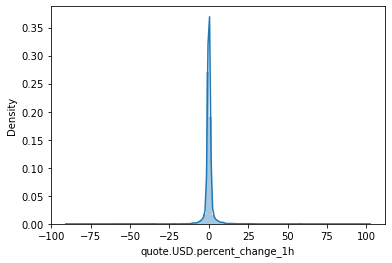

In [97]:
num_of_bins = 100
sns.distplot(data['quote.USD.percent_change_1h'], bins=num_of_bins)

In [89]:
data['quote.USD.percent_change_24h'][1000:5001].describe()

count   4000.00
mean       3.48
std       85.37
min      -99.19
25%       -2.53
50%        0.02
75%        2.77
max     5193.27
Name: quote.USD.percent_change_24h, dtype: float64

<AxesSubplot:xlabel='quote.USD.percent_change_1h', ylabel='quote.USD.price'>

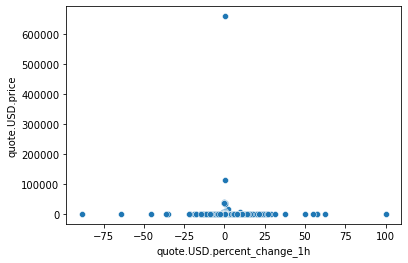

In [102]:
sns.scatterplot(data=data, x ='quote.USD.percent_change_1h', y='quote.USD.price' )